<a href="https://colab.research.google.com/github/Yass-Bak/Atelier1/blob/main/Examen_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E_Examen Session Principale**
## Data Mining
(2022-2023)
---

**Importation des modules**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [28]:
#Assemblage Google Drive dans Colaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 1/Charger le jeu de donnée d’apprentissage train_maintenance.csv dans un dataframe nommé
𝐭𝐫𝐚𝐢𝐧_𝐝𝐟_𝐦. Afficher le nombre de valeurs manquantes pour chaque attribut (0.5 pt)

In [29]:
train_df_m=pd.read_csv('/content/drive/MyDrive/train_maintenance.csv')
train_df_m.head()

,Type,AT,PT,RS,Torque,TW,Failure,Failure Type
0,M,298.1,308.6,NaN,42.8,0,yes,No Failure
1,L,298.2,308.7,NaN,46.3,0,yes,No Failure
2,L,NaN,308.5,NaN,49.4,0,yes,No Failure
3,L,NaN,308.6,1433.0,39.5,0,yes,No Failure
4,L,298.2,308.7,NaN,40.0,0,no,No Failure



2/ Compléter la fonction 𝐭_𝐯𝐚𝐥𝐞𝐮𝐫𝐬_𝐦𝐚𝐧𝐪𝐮𝐚𝐧𝐭𝐞𝐬(𝐝𝐟 = 𝐭𝐫𝐚𝐢𝐧_𝐝𝐟_𝐦) qui permet de remplacer les
valeurs manquantes de l’attribut AT par la moyenne des valeurs de la même colonne et supprimer les
observations ayant des valeurs manquantes dans l’attribut RS (1.25 pts)

In [30]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
def t_valeurs_manquantes(df=train_df_m):
  f_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
  arr=f_imputer.fit_transform(df.loc[:,['AT']])
  #: les lignes , [] -- les colones dans ce cas on a just AT
  df['AT']=pd.DataFrame(arr,columns=['AT'])
  df.dropna(subset=['RS'], inplace=True )
  df=df.reset_index(drop=True)
  print( df.isnull().sum())
  return df
train_df_m=t_valeurs_manquantes()
train_df_m

Type            0
AT              0
PT              0
RS              0
Torque          0
TW              0
Failure         0
Failure Type    0
dtype: int64


,Type,AT,PT,RS,Torque,TW,Failure,Failure Type
0,L,300.443422,308.6,1433.0,39.5,0,yes,No Failure
1,L,298.100000,308.6,1527.0,40.2,0,no,No Failure
2,M,298.300000,308.7,1667.0,28.6,0,no,No Failure
3,M,298.500000,309.0,1741.0,28.0,0,no,No Failure
4,M,298.600000,309.1,1339.0,51.1,0,no,No Failure
...,...,...,...,...,...,...,...,...
4476,L,300.500000,310.6,1368.0,49.6,0,no,No Failure
4477,L,300.500000,310.5,1536.0,36.2,0,no,No Failure
4478,M,300.500000,310.5,1469.0,42.9,0,no,No Failure
4479,L,300.500000,310.5,2633.0,12.2,0,yes,Power Failure


3/ Compléter la fonction 𝐧𝐨𝐫𝐦𝐚𝐥𝐢𝐬𝐞𝐫_𝐚𝐭𝐭𝐫𝐢𝐛𝐮𝐭𝐬(𝐝𝐟 = 𝐭𝐫𝐚𝐢𝐧_𝐝𝐟_𝐦, 𝐚𝐭𝐭𝐫) qui permet de normaliser la liste des
attributs de type 'float' en appliquant MinMaxScaler (1 pt)

In [31]:
def normaliser_attributs(df=train_df_m):
  enc=MinMaxScaler()
  list_att_float=list(df.select_dtypes(include='float'))
  df.loc[:,list_att_float]=enc.fit_transform(df.loc[:,list_att_float])
  print(list_att_float)
  return df
train_df_m=normaliser_attributs()
train_df_m


['AT', 'PT', 'RS', 'Torque']


,Type,AT,PT,RS,Torque,TW,Failure,Failure Type
0,L,0.565211,0.3500,0.154249,0.493094,0,yes,No Failure
1,L,0.307692,0.3500,0.208964,0.502762,0,no,No Failure
2,M,0.329670,0.3625,0.290454,0.342541,0,no,No Failure
3,M,0.351648,0.4000,0.333527,0.334254,0,no,No Failure
4,M,0.362637,0.4125,0.099534,0.653315,0,no,No Failure
...,...,...,...,...,...,...,...,...
4476,L,0.571429,0.6000,0.116414,0.632597,0,no,No Failure
4477,L,0.571429,0.5875,0.214203,0.447514,0,no,No Failure
4478,M,0.571429,0.5875,0.175204,0.540055,0,no,No Failure
4479,L,0.571429,0.5875,0.852736,0.116022,0,yes,Power Failure


4/ Créer une fonction 𝐨𝐧𝐞_𝐡𝐨𝐭_𝐞𝐧𝐜𝐨𝐝𝐞𝐫(𝐝𝐟 = 𝐭𝐫𝐚𝐢𝐧_𝐝𝐟_𝐦) qui transforme les 3 valeurs de l’attribut
Type en 3 attributs binaires : 1 et 0. Les nouvelles colonnes doivent être ajouter dans les 3 premières
positions du dataframe résultat selon l’ordre suivant ['M', 'L', 'H'] (1.25 pts)

In [32]:
def one_hot_encoder(df=train_df_m):
  enc=OneHotEncoder(sparse_output=False, categories=[['M', 'L', 'H']])
  arr=enc.fit_transform(df.loc[:,['Type']])
  df_arr=pd.DataFrame(arr, columns=['M', 'L', 'H'])
  return pd.concat([df_arr, df.iloc[:, 1:]], axis=1)
train_df_m=one_hot_encoder()
train_df_m


,M,L,H,AT,PT,RS,Torque,TW,Failure,Failure Type
0,0.0,1.0,0.0,0.565211,0.3500,0.154249,0.493094,0,yes,No Failure
1,0.0,1.0,0.0,0.307692,0.3500,0.208964,0.502762,0,no,No Failure
2,1.0,0.0,0.0,0.329670,0.3625,0.290454,0.342541,0,no,No Failure
3,1.0,0.0,0.0,0.351648,0.4000,0.333527,0.334254,0,no,No Failure
4,1.0,0.0,0.0,0.362637,0.4125,0.099534,0.653315,0,no,No Failure
...,...,...,...,...,...,...,...,...,...,...
4476,0.0,1.0,0.0,0.571429,0.6000,0.116414,0.632597,0,no,No Failure
4477,0.0,1.0,0.0,0.571429,0.5875,0.214203,0.447514,0,no,No Failure
4478,1.0,0.0,0.0,0.571429,0.5875,0.175204,0.540055,0,no,No Failure
4479,0.0,1.0,0.0,0.571429,0.5875,0.852736,0.116022,0,yes,Power Failure


5/ Créer la fonction 𝐬𝐮𝐩𝐩𝐫𝐢𝐦𝐞𝐫_𝐨_𝐚𝐛𝐞𝐫𝐫𝐚𝐧𝐭𝐞𝐬(𝐝𝐟 = 𝐭𝐫𝐚𝐢𝐧_𝐝𝐟_𝐦) qui permet de supprimer les
observations ayant comme classe désirée Failure=yes et Failure Type=No Failure (1.75 pts)

In [33]:
def supprimer_o_aberrantes(df=train_df_m):
  l=df[(df['Failure']=="yes") & (df['Failure Type']=="No Failure")].index
  df.drop(l, inplace=True)
  df.reset_index(drop=True, inplace=True)
  return df
train_df_m=supprimer_o_aberrantes()
train_df_m

,M,L,H,AT,PT,RS,Torque,TW,Failure,Failure Type
0,0.0,1.0,0.0,0.307692,0.3500,0.208964,0.502762,0,no,No Failure
1,1.0,0.0,0.0,0.329670,0.3625,0.290454,0.342541,0,no,No Failure
2,1.0,0.0,0.0,0.351648,0.4000,0.333527,0.334254,0,no,No Failure
3,1.0,0.0,0.0,0.362637,0.4125,0.099534,0.653315,0,no,No Failure
4,0.0,1.0,0.0,0.362637,0.4250,0.504657,0.218232,0,no,No Failure
...,...,...,...,...,...,...,...,...,...,...
4462,0.0,1.0,0.0,0.571429,0.6000,0.116414,0.632597,0,no,No Failure
4463,0.0,1.0,0.0,0.571429,0.5875,0.214203,0.447514,0,no,No Failure
4464,1.0,0.0,0.0,0.571429,0.5875,0.175204,0.540055,0,no,No Failure
4465,0.0,1.0,0.0,0.571429,0.5875,0.852736,0.116022,0,yes,Power Failure


6/ Compléter le code pour représenter les deux histogrammes de répartition des attributs Failure
et Failure Type de 𝐭𝐫𝐚𝐢𝐧_𝐝𝐟_𝐦 dans la même figure (2 axes dans la même ligne) (1.5 pts)

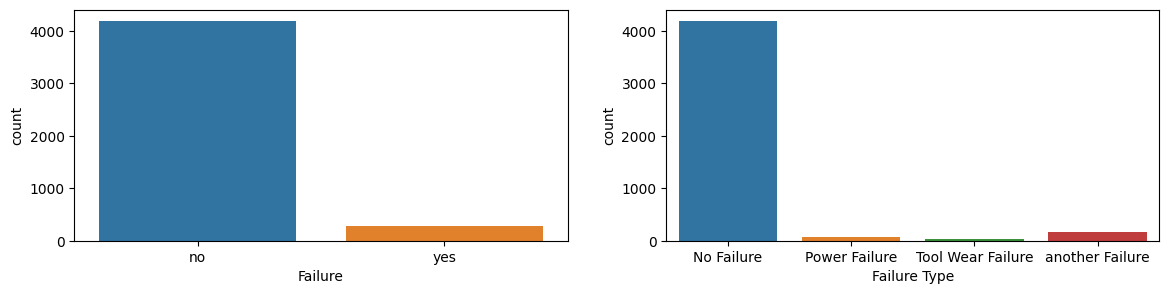

In [34]:
plt.figure(figsize=(14, 3))

L= ['Failure','Failure Type']
for i in range(2):
  ax=plt.subplot(1,2,i+1)
  sns.countplot(x=L[i], data=train_df_m)

plt.show()

7/ Compléter la fonction 𝐭𝐫𝐚𝐧𝐬𝐟𝐨𝐫𝐦𝐞𝐫(𝐝𝐟 = 𝐭𝐫𝐚𝐢𝐧_𝐝𝐟_𝐦) qui permet transformer 𝐝𝐟 en 2 tableaux
ndarray 𝐗 et 𝐘 : 𝐗 contient les valeurs des descripteurs et 𝐘 contient les valeurs de la variable à
prédire (Failure) (1.5 pts)

In [35]:
def transformer(df=train_df_m):
  X=df.iloc[:, :-2].values #tejem te5dem be loc w tati asemii les colones
  Y=df.iloc[:, -2].values #tejem te5dem be loc w tati asemii les colones
  print(X)
  print(Y)
  return X,Y
X_train,Y_train=transformer(df=train_df_m)

[[0.         1.         0.         ... 0.20896391 0.50276243 0.        ]
 [1.         0.         0.         ... 0.29045402 0.34254144 0.        ]
 [1.         0.         0.         ... 0.33352736 0.33425414 0.        ]
 ...
 [1.         0.         0.         ... 0.17520373 0.54005525 0.        ]
 [0.         1.         0.         ... 0.85273574 0.1160221  0.        ]
 [0.         1.         0.         ... 0.07566938 0.79558011 0.        ]]
['no' 'no' 'no' ... 'no' 'yes' 'no']


8/ Appliquer DecisionTreeClassifier pour générer un modèle de prédiction, nommé
𝐜𝐥𝐬_𝐦𝐚𝐢𝐧𝐭𝐞𝐧𝐚𝐧𝐜𝐞, permettant la classification des pannes (Failure) en 'yes' ou 'no', avec une
profondeur maximale de l’arbre fixée à 2 (0.75 pt)

In [36]:
cls_maintenance = DecisionTreeClassifier(max_depth=2)
cls_maintenance.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2)

9/ Charger le jeu de donnée de test test_maintenance.csv dans un dataframe nommé 𝐭𝐞𝐬𝐭_𝐝𝐟_𝐦.
Puis, représenter la matrice de confusion associée à 𝐭𝐞𝐬𝐭_𝐝𝐟_𝐦 en utilisant 𝐜𝐥𝐬_𝐦𝐚𝐢𝐧𝐭𝐞𝐧𝐚𝐧𝐜𝐞 (2 pts)

In [46]:
test_df_m=pd.read_csv('/content/drive/MyDrive/test_maintenance.csv')
test_df_m=t_valeurs_manquantes(test_df_m)
test_df_m=one_hot_encoder(test_df_m)
test_df_m=normaliser_attributs(test_df_m)
test_df_m=supprimer_o_aberrantes(test_df_m)
###########################################
X_test,Y_test=transformer(test_df_m)
Y_pred=cls_maintenance.predict(X_test)
###########################################
confusion_matrix(Y_test,Y_pred)

Type            0
AT              0
PT              0
RS              0
Torque          0
TW              0
Failure         0
Failure Type    0
dtype: int64
['M', 'L', 'H', 'AT', 'PT', 'RS', 'Torque']
[[0.         1.         0.         ... 0.17724003 0.49626308 0.        ]
 [0.         1.         0.         ... 0.21451929 0.49925262 0.        ]
 [1.         0.         0.         ... 0.19162852 0.40807175 0.        ]
 ...
 [0.         1.         0.         ... 0.14388489 0.56203288 0.        ]
 [0.         1.         0.         ... 0.29627207 0.27204783 0.        ]
 [1.         0.         0.         ... 0.27665141 0.29596413 0.        ]]
['no' 'no' 'no' ... 'no' 'no' 'no']


array([[1812,   28],
       [  44,   14]])

10/Afficher l’exactitude (accuracy) du modèle 𝐜𝐥𝐬_𝐦𝐚𝐢𝐧𝐭𝐞𝐧𝐚𝐧𝐜𝐞 sur les données de test (0.5 pt)

In [43]:
print(accuracy_score(Y_test, Y_pred))

0.9620653319283456
